In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, Eq, solve
import numpy as np
import math

In [2]:
def rotate_3d(alpha, beta, gamma):
    # Rotation matrices around x, y, z axes
    rot_x = np.array([[1, 0, 0],
                      [0, np.cos(alpha), -np.sin(alpha)],
                      [0, np.sin(alpha), np.cos(alpha)]])
    rot_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                      [0, 1, 0],
                      [-np.sin(beta), 0, np.cos(beta)]])
    rot_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                      [np.sin(gamma), np.cos(gamma), 0],
                      [0, 0, 1]])
    # Combine the rotations
    return rot_z.dot(rot_y).dot(rot_x)


def rotate_circle(circle, alpha, beta, gamma):
    rotation_matrix = rotate_3d(alpha, beta, gamma)
    return rotation_matrix.dot(circle.T).T


def rotate_vector(vector, alpha, beta, gamma):
    vector_col = np.array(vector).reshape(3, 1)
    rotation_matrix = rotate_3d(alpha, beta, gamma)
    rotated_vector_col = np.dot(rotation_matrix, vector_col)
    return rotated_vector_col.flatten()


def minor_angle_between_vectors(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)

    cos_theta = dot_product / (norm_vector1 * norm_vector2)
    # Ensure cos_theta is within [-1, 1] range
    cos_theta = min(1, max(cos_theta, -1))  

    angle = np.arccos(cos_theta)
    return angle

In [3]:
class Circle():
    # create a circle with specified radius and center 
    def __init__(self, radius, center, sample_size=500):
        self.radius = radius
        self.center = np.array(center)
        self.sample_size = sample_size
        self.theta = np.linspace(0, 2*np.pi, self.sample_size)
        self.x = self.center[0] + self.radius*np.cos(self.theta)
        self.y = self.center[1] + self.radius*np.sin(self.theta)
        self.z = self.center[2] + np.zeros_like(self.theta)
        self.vectors = np.column_stack([self.x, self.y, self.z])
        # self.y_as_function_of_x = lambda x: self.center[1] + np.sqrt(self.radius**2 - (x - self.center[0])**2)

## One B field and two NVs

In [4]:
def get_circle_from_vectors(v1, v2, sample_size=1000):

    v1_mode = np.linalg.norm(v1)
    v1_norm = v1/v1_mode
    
    proj_len = np.dot(v2, v1) / v1_mode
    # print(proj_len)
    minor_angle = minor_angle_between_vectors(v1, v2)
    # print(minor_angle)
    
    radius = np.tan(minor_angle)*proj_len
    center = proj_len*v1_norm
    # print(radius)
    # print(center)
    # print('---')
    return Circle(radius, center, sample_size=sample_size)


def calculate_angle_spectrum(arr1, arr2):
    angle_spectrum = []
    for k in arr1:
        for i in arr2:
            angle_spectrum.append(minor_angle_between_vectors(k, i))
    return np.array(angle_spectrum)


def minor_angle_hist(spec_lst, label_lst, bins=100, norm=True, angle_unit='radians'):
    plt.figure()
    for spec, lab in zip(spec_lst, label_lst):
        hist, bin_edges = np.histogram(spec, bins=bins, density=True)
        bins_center = (bin_edges[:-1] + bin_edges[1:]) / 2
        if norm:
            hist = hist / sum(hist)

        plt.plot(bins_center, hist, label=lab)

    plt.xlabel(f'Angles {angle_unit}')
    plt.ylabel('Probability')
    plt.legend()


def generate_random_orientations(cnt=1):
    NV_init = np.array([0, 0, 1])
    if cnt == 1:
        alpha, beta, gamma = np.random.uniform(0, 2*np.pi, 3)
        return rotate_vector(NV_init, alpha, beta, gamma)
    else:
        ret = []
        while(cnt>0):
            alpha, beta, gamma = np.random.uniform(0, 2*np.pi, 3)
            ret.append(rotate_vector(NV_init, alpha, beta, gamma))
            cnt-=1
        return ret


def generate_random_unit_vector():
    # Step 1: Generate three random numbers
    random_numbers = np.random.normal(size=3)

    # Step 2: Normalize the random numbers to obtain a unit vector
    unit_vector = random_numbers / np.linalg.norm(random_numbers)

    return unit_vector

In [5]:
B = np.array([0, 0, 1])
# NV1, NV2 = generate_random_orientations(cnt=2)
# NV1 = generate_random_unit_vector()
# NV2 = generate_random_unit_vector()
# NV_1_init = np.array([0, 0, 1])
# NV_2_init = np.array([2*np.sqrt(2), 0, -1])/3
# NV_3_init = np.array([-np.sqrt(2), -np.sqrt(6), -1])/3
# print(NV1)
# print(NV2)

In [6]:
# rand_angles = np.random.uniform(0, 2*np.pi, 3)
# NV1_1 = rotate_vector(NV_1_init, rand_angles[0], rand_angles[1], rand_angles[2])
# NV1_2 = rotate_vector(NV_2_init, rand_angles[0], rand_angles[1], rand_angles[2])
# NV1_3 = rotate_vector(NV_3_init, rand_angles[0], rand_angles[1], rand_angles[2])

# rand_angles = np.random.uniform(0, 2*np.pi, 3)
# NV2_1 = rotate_vector(NV_1_init, rand_angles[0], rand_angles[1], rand_angles[2])

In [7]:
# minor_angle_between_vectors(NV1_1, NV1_3)

In [8]:
# circ_NV1_1 = get_circle_from_vectors(B, NV1_1)
# circ_NV1_2 = get_circle_from_vectors(B, NV1_2)
# circ_NV1_3 = get_circle_from_vectors(B, NV1_3)
# circ_NV2_1 = get_circle_from_vectors(B, NV2_1)

In [9]:
# rand_angles = np.random.uniform(0, 2*np.pi, 3)
# NV1_1_rot = rotate_vector(NV1_1, rand_angles[0], rand_angles[1], rand_angles[2])
# NV2_1_rot = rotate_vector(NV2_1, rand_angles[0], rand_angles[1], rand_angles[2])
# circ_NV1_1_rot = get_circle_from_vectors(B, NV1_1_rot)
# circ_NV2_1_rot = get_circle_from_vectors(B, NV2_1_rot)

In [10]:
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111, projection='3d')

# ax2.set_xlim(-1, 1)
# ax2.set_ylim(-1, 1)
# ax2.set_zlim(-1, 1)

# # Plot the rotated circles
# ax2.quiver(0, 0, 0, B[0], B[1], B[2], color='green', label='B field')
# # ax2.quiver(0, 0, 0, NV1[0], NV1[1], NV1[2], color='r', label='Nanodiamond 1')
# # ax2.quiver(0, 0, 0, NV1_1[0], NV1_1[1], NV1_1[2], color='r', label='ND1_NV')
# ax2.quiver(0, 0, 0, NV1_1_rot[0], NV1_1_rot[1], NV1_1_rot[2], color='r', label='ND1_NV')
# # ax2.quiver(0, 0, 0, NV1_2[0], NV1_2[1], NV1_2[2], color='b', label='ND1_NV2')
# # ax2.quiver(0, 0, 0, NV1_3[0], NV1_3[1], NV1_3[2], color='cyan', label='ND1_NV3')
# # ax2.quiver(0, 0, 0, NV2_1[0], NV2_1[1], NV2_1[2], color='b', label='ND2_NV')
# ax2.quiver(0, 0, 0, NV2_1_rot[0], NV2_1_rot[1], NV2_1_rot[2], color='b', label='ND2_NV')

# # ax2.plot(circ_NV1_1.vectors[:, 0], circ_NV1_1.vectors[:, 1], circ_NV1_1.vectors[:, 2], c='r') #, label='Circle NV1')
# ax2.plot(circ_NV1_1_rot.vectors[:, 0], circ_NV1_1_rot.vectors[:, 1], circ_NV1_1_rot.vectors[:, 2], c='r')
# # ax2.plot(circ_NV1_2.vectors[:, 0], circ_NV1_2.vectors[:, 1], circ_NV1_2.vectors[:, 2], c='b')#, label='Possible orientations')
# # ax2.plot(circ_NV1_3.vectors[:, 0], circ_NV1_3.vectors[:, 1], circ_NV1_3.vectors[:, 2], c='cyan')
# # ax2.plot(circ_NV2_1.vectors[:, 0], circ_NV2_1.vectors[:, 1], circ_NV2_1.vectors[:, 2], c='b')
# ax2.plot(circ_NV2_1_rot.vectors[:, 0], circ_NV2_1_rot.vectors[:, 1], circ_NV2_1_rot.vectors[:, 2], c='b')

# ax2.set_xlabel('X-axis')
# ax2.set_ylabel('Y-axis')
# ax2.set_zlabel('Z-axis')
# ax2.legend()

In [11]:
# randomly select angles for rotation
# rand_angles = np.random.uniform(0, 2*np.pi, 3)
# rand_angles = [0, -np.pi/2, 0]

# NV1_rot = rotate_vector(NV1, rand_angles[0], rand_angles[1], rand_angles[2])
# NV2_rot = rotate_vector(NV2, rand_angles[0], rand_angles[1], rand_angles[2])

# circ_NV1_rot = get_circle_from_vectors(B, NV1_rot)
# circ_NV2_rot = get_circle_from_vectors(B, NV2_rot)

# rotated_circ_NV1 = rotate_circle(circ_NV1.vectors, rand_angles[0], rand_angles[1], rand_angles[2])
# rotated_circ_NV2 = rotate_circle(circ_NV2.vectors, rand_angles[0], rand_angles[1], rand_angles[2])

In [12]:
# circ_NV1_rot = get_circle_from_vectors(B_2, NV1_rot)
# circ_NV2_rot = get_circle_from_vectors(B_2, NV2_rot)

## Multiple Rotations

In [13]:
def common_elements_with_error(list_of_lists, error_bound=1e-6):
    if not list_of_lists:
        return []

    # Convert each sublist to a set of tuples, rounding each element to the specified error bound
    rounded_sets = [set((round(elem, -int(math.log10(error_bound))),) for elem in sublist) for sublist in list_of_lists]

    # Find the intersection of all sets
    common_set = set.intersection(*rounded_sets)

    # Convert the result back to a list
    common_list = [elem[0] for elem in common_set]

    return common_list


def plot_dual_axis(x_values, y1_values, y2_values, y1_label, y2_label, title=None):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Rotation number')
    ax1.set_ylabel(y1_label, color=color)
    ax1.plot(x_values, y1_values, color=color, linestyle='--', marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2_label, color=color)
    ax2.plot(x_values, y2_values, color=color, linestyle='--', marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    if title is not None:
        plt.title(title)
    
    fig.tight_layout()
    plt.show()

In [54]:
# NV1_multi, NV2_multi = generate_random_orientations(cnt=2)
NV1_multi = [0, 0, 1]
# 1.91 is 109.5 degrees in radians
NV2_multi = rotate_vector(NV1_multi, 1.91, 0, 0)

rand_angles = np.random.uniform(0, 2*np.pi, 3)
NV1_multi = rotate_vector(NV1_multi, rand_angles[0], rand_angles[1], rand_angles[2])
NV2_multi = rotate_vector(NV2_multi, rand_angles[0], rand_angles[1], rand_angles[2])
plane_1 = np.cross(NV1_multi, NV2_multi)

rand_angles = np.random.uniform(0, 2*np.pi, 3)
NV3_multi = rotate_vector(NV1_multi, rand_angles[0], rand_angles[1], rand_angles[2])
NV4_multi = rotate_vector(NV2_multi, rand_angles[0], rand_angles[1], rand_angles[2])
plane_2 = np.cross(NV3_multi, NV4_multi)


print(f'NV1: {NV1_multi}')
print(f'NV2: {NV2_multi}')
print(f'Plane 1: {plane_1}')

print(f'NV3: {NV3_multi}')
print(f'NV4: {NV4_multi}')
print(f'Plane 2: {plane_2}')

inter_angle = minor_angle_between_vectors(NV1_multi, NV2_multi)
print(f'Angle between NV1 and NV2: {inter_angle}')
print(f'Angle between NV1 and NV3: {minor_angle_between_vectors(NV1_multi, NV3_multi)}')
print(f'Angle between Plane 1 and Plane 2: {minor_angle_between_vectors(plane_1, plane_2)}')

NV1: [0.16714842 0.27592978 0.94653271]
NV2: [ 0.01383132  0.80769969 -0.58943185]
Plane 1: [-0.92715597  0.1116144   0.13118925]
NV3: [ 0.91024519  0.28892221 -0.29661027]
NV4: [-0.44722369 -0.50237379 -0.7400078 ]
Plane 2: [-0.36281391  0.80623968 -0.32807047]
Angle between NV1 and NV2: 1.9099999999999997
Angle between NV1 and NV3: 1.6196988526571106
Angle between Plane 1 and Plane 2: 1.1251318176174934


In [55]:
sample_size = 500
circ_NV1_multi = get_circle_from_vectors(B, NV1_multi, sample_size=sample_size)
circ_NV2_multi = get_circle_from_vectors(B, NV2_multi, sample_size=sample_size)
circ_NV3_multi = get_circle_from_vectors(B, NV3_multi, sample_size=sample_size)
circ_NV4_multi = get_circle_from_vectors(B, NV4_multi, sample_size=sample_size)

In [56]:
batch_size = 10
rot_cnt = 10

overlap_mean_meta = []
overlap_var_meta = []
angle_spec_meta = []
overlap_meta = []

repeat_iteration = False

for k in range(batch_size):
    print(f'------------Run {k+1}------------')
    angle_spec_lst_multi = []
    overlap_mean_lst = []
    overlap_var_lst = []
    overlap_lst = []
    
    for i in range(rot_cnt):
        print(f'Rotation {i+1}')
        repeat_iteration = True
        
        while repeat_iteration:
            # Generate random rotation angles
            cur_rand_angles = np.random.uniform(0, 2*np.pi, 3)
    
            # Rotate the NV vectors
            NV1_multi = rotate_vector(NV1_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
            NV2_multi = rotate_vector(NV2_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
            NV3_multi = rotate_vector(NV3_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
            NV4_multi = rotate_vector(NV4_multi, cur_rand_angles[0], cur_rand_angles[1], cur_rand_angles[2])
    
            # Get the circles
            circ_NV1_multi = get_circle_from_vectors(B, NV1_multi, sample_size=500)
            circ_NV2_multi = get_circle_from_vectors(B, NV2_multi, sample_size=500)
            circ_NV3_multi = get_circle_from_vectors(B, NV3_multi, sample_size=500)
            circ_NV4_multi = get_circle_from_vectors(B, NV4_multi, sample_size=500)

            ### --------------- FOR 4 NV CASE / PLANE VECTORS ---------------
            
            # Find possible plane vectors
            target_angle = 1.91
            err = 0.01
            
            plane_1_lst = []
            for k in circ_NV1_multi.vectors:
                for i in circ_NV2_multi.vectors:
                    cur_angle = minor_angle_between_vectors(k, i)
                    if cur_angle >= (target_angle - err) and cur_angle <= (target_angle + err):
                        plane_1_lst.append(np.cross(k, i))

            plane_1_arr = np.array(plane_1_lst)
            plane_1_arr = plane_1_arr[plane_1_arr[:, 2] > 0]
            
            if len(plane_1_lst) == 0:
                continue
            
            print(f'Got possible plane 1 vectors with length {len(plane_1_lst)}')
            
            plane_2_lst = []
            for k in circ_NV3_multi.vectors:
                for i in circ_NV4_multi.vectors:
                    cur_angle = minor_angle_between_vectors(k, i)
                    if cur_angle >= (target_angle - err) and cur_angle <= (target_angle + err):
                        plane_2_lst.append(np.cross(k, i))

            plane_2_arr = np.array(plane_2_lst)
            # plane_2_arr = plane_2_arr[plane_2_arr[:, 2] > 0]
            
            if len(plane_2_lst) == 0:
                continue
            
            print(f'Got possible plane 2 vectors with length {len(plane_2_lst)}')
            
            # Calculate minor angle spectrum between plane vectors
            angle_spec = calculate_angle_spectrum([plane_1_arr[0]], plane_2_arr)

            angle_spec_lst_multi.append(angle_spec)
            cur_overlap = common_elements_with_error(angle_spec_lst_multi, error_bound=0.01)
            overlap_lst.append(cur_overlap)
            overlap_mean_lst.append(np.mean(cur_overlap))
            overlap_var_lst.append(np.var(cur_overlap))

            repeat_iteration = False

    angle_spec_meta.append(angle_spec_lst_multi)
    overlap_meta.append(overlap_lst)
    overlap_mean_meta.append(overlap_mean_lst)
    overlap_var_meta.append(overlap_var_lst)

------------Run 1------------
Rotation 1
Got possible plane 1 vectors with length 2004
Got possible plane 2 vectors with length 2004
Rotation 2
Got possible plane 1 vectors with length 34570
Got possible plane 2 vectors with length 7014
Rotation 3
Got possible plane 1 vectors with length 2004
Got possible plane 2 vectors with length 2004
Rotation 4
Got possible plane 1 vectors with length 3006
Got possible plane 2 vectors with length 4008
Rotation 5
Got possible plane 1 vectors with length 6012
Got possible plane 2 vectors with length 4008
Rotation 6
Got possible plane 1 vectors with length 10020
Got possible plane 2 vectors with length 2004
Rotation 7
Got possible plane 1 vectors with length 2004
Got possible plane 2 vectors with length 6012
Rotation 8
Got possible plane 1 vectors with length 2004
Got possible plane 2 vectors with length 28558
Rotation 9
Got possible plane 1 vectors with length 6012
Got possible plane 2 vectors with length 3006
Rotation 10
Got possible plane 1 vectors

Text(0.5, 1.0, 'Run 8 \n Init plane 1: [-0.92715597  0.1116144   0.13118925] \n Init plane 2: [-0.36281391  0.80623968 -0.32807047] \n True inter-angle = 64.465')

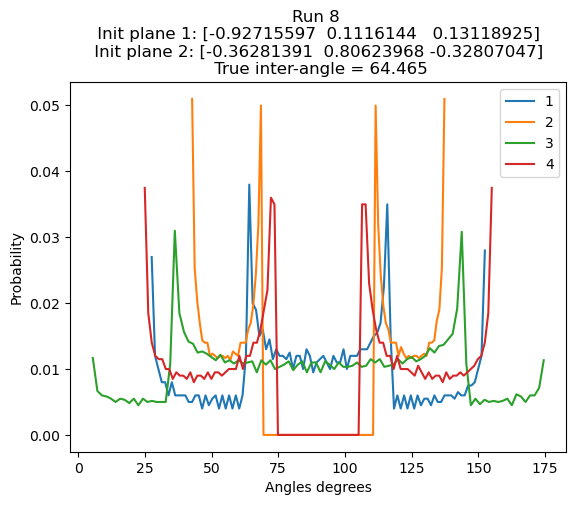

In [93]:
plot_which_run = 7
plot_up_to_rot = 5
# minor_angle_hist(angle_spec_meta[plot_which_run][:plot_up_to_rot], range(1, plot_up_to_rot))
minor_angle_hist([s * (360 / (2*np.pi)) for s in angle_spec_meta[plot_which_run][:plot_up_to_rot]], range(1, plot_up_to_rot), angle_unit='degrees')
plt.title(f'Run {plot_which_run+1} \n Init plane 1: {plane_1} \n Init plane 2: {plane_2} \n True inter-angle = {inter_angle_deg:.3f}')

In [94]:
cur_overlap_deg = np.array(overlap_meta[plot_which_run][plot_up_to_rot]) * (360 / (2*np.pi))
print(f'cur_overlap min: {min(cur_overlap_deg)} degrees')
print(f'cur_overlap max: {max(cur_overlap_deg)} degrees')

cur_overlap min: 63.598315259521385 degrees
cur_overlap max: 116.3104324115571 degrees


In [58]:
plot_up_to_run = 10
# inter_angle_deg = inter_angle * (360 / (2*np.pi)) 
inter_angle_deg = minor_angle_between_vectors(plane_1, plane_2) * (360 / (2*np.pi))
overlap_mean_meta_avg_deg = np.mean(overlap_mean_meta[:plot_up_to_run], axis=0)  * (360 / (2*np.pi))
overlap_var_meta_avg_deg = np.mean(overlap_var_meta[:plot_up_to_run], axis=0) * (360 / (2*np.pi))

Text(0.5, 1.0, 'Avg. over 10 runs. \n Init plane 1: [-0.92715597  0.1116144   0.13118925] \n Init plane 2: [-0.36281391  0.80623968 -0.32807047] \n True inter-angle = 64.465')

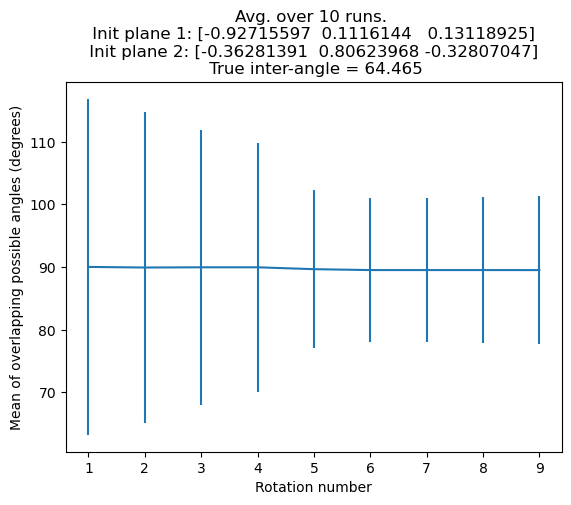

In [59]:
plt.errorbar(x=range(1, 10), y=overlap_mean_meta_avg_deg[1:], yerr=overlap_var_meta_avg_deg[1:])
plt.xlabel('Rotation number')
plt.ylabel('Mean of overlapping possible angles (degrees)')
# plt.title(f'Avg. over {plot_up_to_run} runs. \n Init NV1: {NV1_multi} \n Init NV2: {NV2_multi} \n True inter-angle = {inter_angle_deg:.3f}')
plt.title(f'Avg. over {plot_up_to_run} runs. \n Init plane 1: {plane_1} \n Init plane 2: {plane_2} \n True inter-angle = {inter_angle_deg:.3f}')

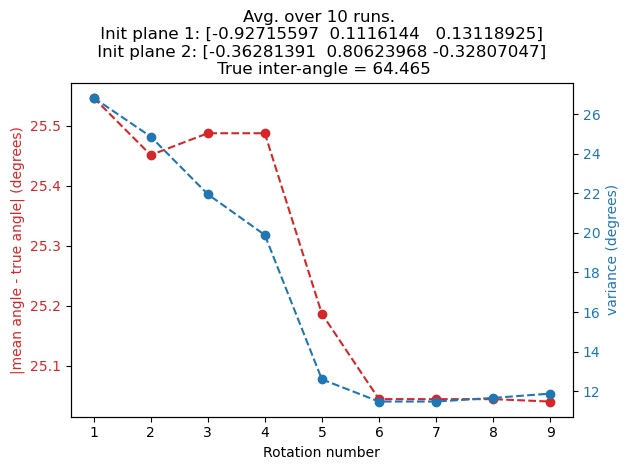

In [60]:
# plot_dual_axis(range(1, 10), np.abs(overlap_mean_meta_avg_deg - inter_angle_deg)[1:], 
#                              overlap_var_meta_avg_deg[1:], '|mean angle - true angle| (degrees)', 'variance (degrees)',
#                title=f'Avg. over {plot_up_to_run} runs. \n Init NV1: {NV1_multi} \n Init NV2: {NV2_multi} \n True inter-angle = {inter_angle_deg:.3f}')

plot_dual_axis(range(1, 10), np.abs(overlap_mean_meta_avg_deg - inter_angle_deg)[1:], 
                             overlap_var_meta_avg_deg[1:], '|mean angle - true angle| (degrees)', 'variance (degrees)',
               title=f'Avg. over {plot_up_to_run} runs. \n Init plane 1: {plane_1} \n Init plane 2: {plane_2} \n True inter-angle = {inter_angle_deg:.3f}')

## Spectrum Distinguishability

In [189]:
NV_lst = generate_random_orientations(cnt=10)
NV_pair_lst = []
for i in range(0, len(NV_lst), 2):
    pair = NV_lst[i:i+2]
    NV_pair_lst.append(pair)

In [190]:
angle_spec_lst = []
for NV_pair in NV_pair_lst:
    cur_circ_1 = get_circle_from_vectors(B, NV_pair[0])
    cur_circ_2 = get_circle_from_vectors(B, NV_pair[1])
    angle_spec_lst.append(calculate_angle_spectrum(cur_circ_1, cur_circ_2))

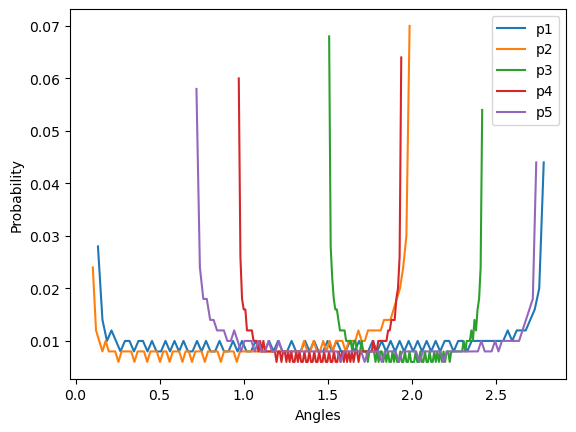

In [191]:
minor_angle_hist(angle_spec_lst, ['p1', 'p2', 'p3', 'p4', 'p5'])